In [1]:
%matplotlib inline
import carmcmc as cm
import numpy as np
import matplotlib.pyplot as plt


sigmay = 2.3 
p = 5 
mu = 17.0  
qpo_width = np.array([1.0/100.0, 1.0/300.0, 1.0/200.0]) 
qpo_cent = np.array([1.0/5.0, 1.0/25.0]) 
ar_roots = cm.get_ar_roots(qpo_width, qpo_cent) 
ar_coefs = np.poly(ar_roots)
ma_coefs = np.array([1.0, 4.5, 1.25, 0.0, 0.0])
sigsqr = sigmay ** 2 / cm.carma_variance(1.0, ar_roots, ma_coefs=ma_coefs)

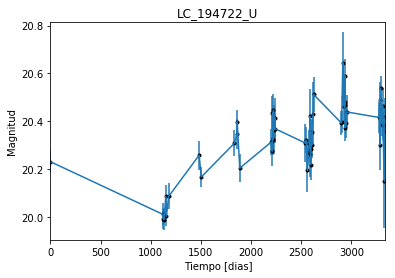

In [2]:
 data = np.genfromtxt('LC_194722_U.dat')
juldate = data[:,0]  
t = juldate - juldate.min()  
y = data[:,1]  
yerr = data[:,2]  

plt.errorbar(t, y, yerr=yerr)
plt.plot(t, y, 'k.')
plt.xlim(t.min(), t.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('LC_194722_U')
plt.savefig("LC_194722_U.pdf")

In [3]:
model = cm.CarmaModel(t, y, yerr, p=4, q=1)

In [4]:
%%capture capt
sample = model.run_mcmc(20000)

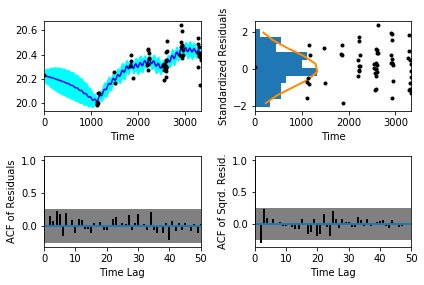

In [5]:
sample.assess_fit()

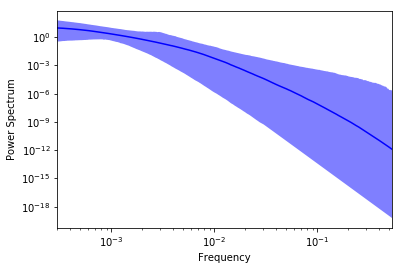

In [6]:
psd_low, psd_hi, psd_mid, frequencies = sample.plot_power_spectrum(percentile=95.0, nsamples=5000)

In [7]:
dt = t[1:] - t[:-1]
noise_level = 2.0 * np.mean(dt) * np.mean(yerr ** 2)

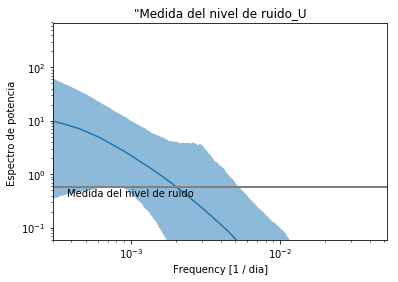

In [8]:
plt.loglog(frequencies, psd_mid)
plt.fill_between(frequencies, psd_hi, y2=psd_low, alpha=0.5)
plt.loglog(frequencies, np.ones(frequencies.size) * noise_level, color='grey', lw=2)
plt.ylim(noise_level / 10.0, plt.ylim()[1])
plt.xlim(frequencies.min(), frequencies[psd_hi > noise_level].max() * 10.0)
plt.ylabel('Espectro de potencia ')
plt.xlabel('Frequency [1 / dia]')
plt.annotate("Medida del nivel de ruido", (1.25 * plt.xlim()[0], noise_level / 1.5))
plt.title('LC_194722_U')
plt.title('"Medida del nivel de ruido_U')
plt.savefig("Medida del nivel de ruido_U.pdf")

Text(0.5,1,'Prediccion , valor esperado LC_194722_U')

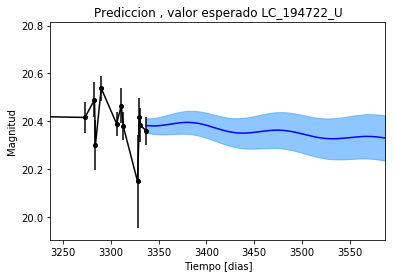

In [9]:
tpredict = t.max() + np.linspace(0.0, 250.0, 250)
ypredict, yp_var = sample.predict(tpredict)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tpredict, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tpredict, ypredict, 'b-')
plt.xlim(tpredict.min() - 100, tpredict.max())
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.title('Prediccion , valor esperado LC_194722_U')

Text(0.5,1,'Prediccion, Caminos simulados  LC_194722_U')

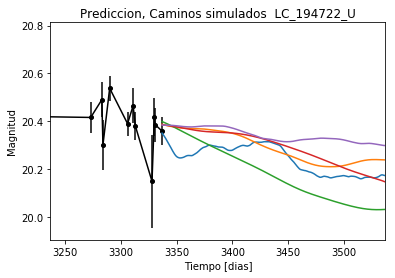

In [10]:
tpredict = t.max() + np.linspace(0.0, 200.0, 250)
npaths = 5
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
for i in range(npaths):
    ysim = sample.simulate(tpredict, bestfit='random')  
    plt.plot(tpredict, ysim)
plt.xlabel('Tiempo [dias]')
plt.ylabel('Magnitud')
plt.xlim(tpredict.min()-100, tpredict.max())
plt.title('Prediccion, Caminos simulados  LC_194722_U')

/usr/local/lib/python2.7/dist-packages/matplotlib/axes/_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


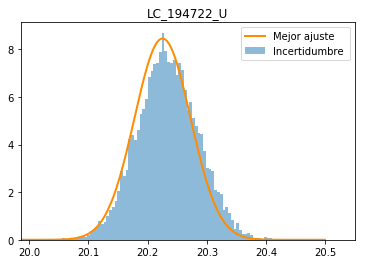

In [11]:
tpredict = 10.0
nsim = 10000
ysim = np.zeros(nsim)
for i in range(nsim):
    ysim[i] = sample.simulate(tpredict, bestfit='random')
yhat, yhvar = sample.predict(tpredict)
plt.hist(ysim, bins=100, alpha=0.5, histtype='stepfilled', normed=True, label='Incertidumbre ')
ymin, ymax = plt.xlim()
ygrid = np.linspace(ymin, ymax, 200)
predictive_pdf = 1.0 / np.sqrt(2.0 * np.pi * yhvar) * np.exp(-0.5 * (ygrid - yhat) ** 2 / yhvar)
plt.plot(ygrid, predictive_pdf, color='DarkOrange', lw=2, label='Mejor ajuste ')
plt.xlim(ymin, ymax + 0.1 * (ymax - ymin))
plt.legend(loc='upper right')
plt.title('LC_194722_U')
plt.savefig("Mejor_ajuste_LC_194722_U.pdf")

Text(0.5,1,'Interpolacion, camino simulado LC_194722_U')

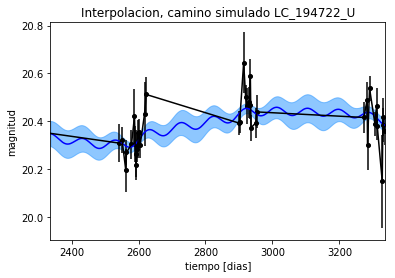

In [12]:
tinterp = t.max() - 1000 + np.linspace(0.0, 1000.0, 500)
ypredict, yp_var = sample.predict(tinterp)
plt.errorbar(t, y, yerr=yerr, color='black')
plt.plot(t, y, 'ko', ms=4)
plt.fill_between(tinterp, ypredict+np.sqrt(yp_var), y2=ypredict-np.sqrt(yp_var), color='DodgerBlue', alpha=0.5)
plt.plot(tinterp, ypredict, 'b-')
plt.xlabel('tiempo [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_U')

Text(0.5,1,'Interpolacion, camino simulado LC_194722_U')

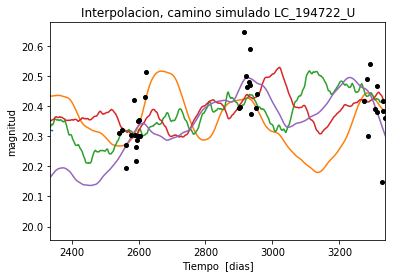

In [13]:
npaths = 5
for i in range(npaths):
    ysim = sample.simulate(tinterp, bestfit='random')
    plt.plot(tinterp, ysim)
plt.plot(t, y, 'ko', ms=4)
plt.xlabel('Tiempo  [dias]')
plt.ylabel('magnitud')
plt.xlim(tinterp.min(), tinterp.max())
plt.title('Interpolacion, camino simulado LC_194722_U')

In [14]:
sample.parameters

['quad_coefs',
 'logpost',
 'ar_coefs',
 'mu',
 'psd_centroid',
 'loglik',
 'psd_width',
 'var',
 'measerr_scale',
 'sigma',
 'ma_coefs',
 'ar_roots']

In [15]:
sample.posterior_summaries('psd_width')

Calculating effective number of samples
Posterior summary for parameter psd_width  element 0
----------------------------------------------
Effective number of independent samples: 702.642425226
Median: 0.0123235381736
Standard deviation: 0.193557540364
68% credibility interval: [ 0.00086396  0.19055886]
95% credibility interval: [  3.45339104e-04   7.74170512e-01]
99% credibility interval: [  3.06925096e-04   9.90255511e-01]
Posterior summary for parameter psd_width  element 1
----------------------------------------------
Effective number of independent samples: 536.685829742
Median: 0.00199363546873
Standard deviation: 0.0899855239849
68% credibility interval: [ 0.00043705  0.03411036]
95% credibility interval: [ 0.00031435  0.29932501]
99% credibility interval: [  3.01293165e-04   6.45890966e-01]
Posterior summary for parameter psd_width  element 2
----------------------------------------------
Effective number of independent samples: 417.154264357
Median: 0.0234222697146
Standard 

In [16]:
sample.posterior_summaries('logpost')

Calculating effective number of samples
Posterior summary for parameter logpost  element 0
----------------------------------------------
Effective number of independent samples: 1026.78074034
Median: 93.5223543183
Standard deviation: 1.57933938938
68% credibility interval: [ 91.78954345  94.68277702]
95% credibility interval: [ 89.27871863  95.35255723]
99% credibility interval: [ 87.26860119  95.59521351]


In [17]:
sample.posterior_summaries('ar_coefs')

Calculating effective number of samples
Posterior summary for parameter ar_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ar_coefs  element 1
----------------------------------------------
Effective number of independent samples: 611.839507537
Median: 0.792190458337
Standard deviation: 2.14673004083
68% credibility interval: [ 0.07049334  3.85318769]
95% credibility interval: [ 0.0151442   7.37770821]
99% credibility interval: [  9.22992495e-03   1.05932256e+01]
Posterior summary for parameter ar_coefs  element 2
----------------------------------------------
Effective number of independent samples: 460.453771707
Median: 0.35492366331
Standard deviation: 9.535299617
68% credibility interval: [ 0.01220318  7.44343018]
95% credibility interval: [  6.2083

In [18]:
sample.posterior_summaries('ma_coefs')

Calculating effective number of samples
Posterior summary for parameter ma_coefs  element 0
----------------------------------------------
Effective number of independent samples: nan
Median: 1.0
Standard deviation: 0.0
68% credibility interval: [ 1.  1.]
95% credibility interval: [ 1.  1.]
99% credibility interval: [ 1.  1.]
Posterior summary for parameter ma_coefs  element 1
----------------------------------------------
Effective number of independent samples: 14721.5625686
Median: 9.14454654297e-33
Standard deviation: 2.55661126218e+101
68% credibility interval: [  3.25752579e-70   3.93591956e-08]
95% credibility interval: [  2.29952986e-92   9.02000195e+49]
99% credibility interval: [  2.69950008e-108   3.77156068e+089]


In [19]:
sample.posterior_summaries('mu')

Calculating effective number of samples
Posterior summary for parameter mu  element 0
----------------------------------------------
Effective number of independent samples: 2192.16883466
Median: 20.2755378614
Standard deviation: 0.0809905123122
68% credibility interval: [ 20.20643699  20.34051297]
95% credibility interval: [ 20.09956992  20.43305446]
99% credibility interval: [ 20.00454826  20.5419506 ]


In [20]:
sample.posterior_summaries('psd_centroid')

Calculating effective number of samples
Posterior summary for parameter psd_centroid  element 0
----------------------------------------------
Effective number of independent samples: 252.546305633
Median: 0.00370055603838
Standard deviation: 0.253924159505
68% credibility interval: [ 0.          0.33599772]
95% credibility interval: [ 0.          0.93202626]
99% credibility interval: [ 0.          1.04224153]
Posterior summary for parameter psd_centroid  element 1
----------------------------------------------
Effective number of independent samples: 252.546305633
Median: 0.00370055603838
Standard deviation: 0.253924159505
68% credibility interval: [ 0.          0.33599772]
95% credibility interval: [ 0.          0.93202626]
99% credibility interval: [ 0.          1.04224153]
Posterior summary for parameter psd_centroid  element 2
----------------------------------------------
Effective number of independent samples: 541.736258091
Median: 0.0
Standard deviation: 0.000656076772073
68% 

In [21]:
sample.posterior_summaries('loglik')

Calculating effective number of samples
Posterior summary for parameter loglik  element 0
----------------------------------------------
Effective number of independent samples: 1026.78074034
Median: 93.5223543183
Standard deviation: 1.57933938938
68% credibility interval: [ 91.78954345  94.68277702]
95% credibility interval: [ 89.27871863  95.35255723]
99% credibility interval: [ 87.26860119  95.59521351]


In [22]:
sample.posterior_summaries('var')

Calculating effective number of samples
Posterior summary for parameter var  element 0
----------------------------------------------
Effective number of independent samples: 1558.41288515
Median: 0.0213605549121
Standard deviation: 0.0275986819638
68% credibility interval: [ 0.01239633  0.04206971]
95% credibility interval: [ 0.00815365  0.09497062]
99% credibility interval: [ 0.00629479  0.17142709]


In [23]:
sample.posterior_summaries('measerr_scale')

Calculating effective number of samples
Posterior summary for parameter measerr_scale  element 0
----------------------------------------------
Effective number of independent samples: 1881.42419701
Median: 0.986571566991
Standard deviation: 0.154195771457
68% credibility interval: [ 0.84876327  1.14800572]
95% credibility interval: [ 0.73509171  1.33550281]
99% credibility interval: [ 0.670358    1.48231655]


In [24]:
sample.posterior_summaries('sigma')

Calculating effective number of samples
Posterior summary for parameter sigma  element 0
----------------------------------------------
Effective number of independent samples: 953.854146571
Median: 8.5228740382e-05
Standard deviation: 0.0841747751068
68% credibility interval: [  6.79362410e-07   5.54270824e-03]
95% credibility interval: [  1.94336705e-53   9.59977648e-02]
99% credibility interval: [  1.36655032e-91   5.28240313e-01]


In [25]:
sample.posterior_summaries('ar_roots')

Calculating effective number of samples
Posterior summary for parameter ar_roots  element 0
----------------------------------------------
Effective number of independent samples: 702.642425226
Median: (-0.077431073985-0.1752305179j)
Standard deviation: 2.0061178569
68% credibility interval: [-1.19731660+0.j         -0.00542841-0.88406737j]
95% credibility interval: [ -4.86425679e+00+0.j          -2.16982958e-03-0.00121222j]
99% credibility interval: [ -6.22195888e+00+0.j          -1.92846726e-03-0.00226063j]
Posterior summary for parameter ar_roots  element 1
----------------------------------------------
Effective number of independent samples: 536.685829742
Median: (-0.012526381085+2.45498433486j)
Standard deviation: 1.69267278468
68% credibility interval: [-0.21432172+0.j         -0.00274605+0.00239057j]
95% credibility interval: [-1.88071452 +3.32232788e+00j -0.00197510 +2.72781338e-03j]
99% credibility interval: [ -4.05825263e+00+6.33081159j  -1.89308079e-03+0.j        ]
Posterio